# **TASK 0: Preliminaries**

## Preamble: import useful packages and functions

In [ ]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load a .csv file and transform it into Pandas DataFrame

In [ ]:
# FIRST OPTION:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['fortune500(2017-2021).csv']))

In [ ]:
# SECOND OPTION:

# Manually load the file in the panel on the left side, then run the following line:
df = pd.read_csv('fortune500(2017-2021).csv')

# **TASK1: Explore the dataset**

In [ ]:
# Print the first 10 objects of the dataset with all their attributes
df.head(10)

In [ ]:
# Print the last 10 objects of the dataset with all their attributes
df.tail(10)

In [ ]:
# Describe the dataset (#objects, #attributes, data types)
# how may objects and attributes
df.shape

In [ ]:
# Data types
df.dtypes

In [ ]:
# Extract the profits (one single column). The exact title of the column is: "Profits ($M)". Using ' or " is equivalent here.
df["Profits ($M)"]

In [ ]:
# Extract only rows of a specific company
df[df.Name=="ABM Industries"]

In [ ]:
# Count the number of items you have per each "year". There are 5 years monitored, i.e., from 2017 to 2021.
df["Year"].value_counts()

In [ ]:
# Repeat the same as above, but print the normalized value (as a percentage of the total number of objects, i.e., the number of rows)
df["Year"].value_counts(normalize=True)

# **TASK2: Manipulate the dataset**

In [ ]:
# Let’s just rename those columns in a simpler way:
df.columns = ['id', 'rank', 'company', 'revenues', 'revenue_perc', 'profits', 'profit_perc', 'assets', 'market_value', 'change1000', 'employees', 'change500', 'year']

# Visualize again the first 10 elements
df.head(10)

**Note**: an "s" was added to "profit" column's name.

### **Handling NaN**

In [ ]:
# Check for NaN in the entire DataFrame
df.isnull()

In [ ]:
# Count the number of NaN in the "profit" column
df["profits"].isnull().sum()

In [ ]:
# Compute the mean, min, max, and standard deviation profit of company = «ABM Industries» in 2017-2021. Note: skipna = True is default.

# mean
m = df[df.company=="ABM Industries"]["profits"].mean(axis=0)

# std
s = df[df.company=="ABM Industries"]["profits"].std(axis=0)

# min
mi = df[df.company=="ABM Industries"]["profits"].min(axis=0)

# max
MA = df[df.company=="ABM Industries"]["profits"].max(axis=0)

print("The mean profit of ABM Industries in the years 2017-2021 is:", m)
print("The std profit of ABM Industries in the years 2017-2021 is:", s.round(2))
# alternative: "%.2f" % a
# print("The std profit of ABM Industries in the years 2017-2021 is: %.2f" % s)
print("The min profit of ABM Industries in the years 2017-2021 is:", mi)
print("The MAX profit of ABM Industries in the years 2017-2021 is:", MA)

In [ ]:
# Decide whether to normalize (min-max normalization) or standardize (z-score) one column and report the first 5 objects before and after manipulation.
# I decide to normalize the profits. Note that "profits" has 2 null values.
p = df["profits"]
print(p)

In [ ]:
# Mode 1 - MANUAL computation
# ---------------------------
# Min-Max normalization: the column minimum value gets transformed into 0 and the maximum value into 1, or normalization to a specific range=(min,max)
p_scaled = (p - p.min()) / (p.max() - p.min())
print("Min-max normalized profits: \n", p_scaled.round(2))

# Z-score normalization:
p_zscore = (p - p.mean()) / p.std()
print("\n Standardized profits: \n", p_zscore.round(2))

# L2 normalization:
from numpy.linalg import norm
norm_l2 = norm( p[~np.isnan(p)] )
p_L2 = p / norm_l2
print("\n Standardized profits: \n", p_L2.round(2))

**DISCLAIMER ON INPUT SHAPE FOR DIFFERENT SCALERS**
- Normalizer operates on different row, independently one of the others. Then, line 13 should be: t = t.reshape(1,-1)
- MinMaxScaler, StandardScaler, and RobustScaler operate on different columns. Then, line 13 becomes: t = t.reshape(-1,1)

To check this, simply print the L2-norm, the minimum, the maximum, the mean, and the standard deviation of the transformed array.


In [ ]:
# Mode 2 - using SCALERS from sklearn.preprocessing
# -------------------------------------------------
# Initialize the scaler you want to use: MinMaxScaler(), StandardScaler(), RobustScaler(), Normalizer()
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
scaler = StandardScaler()

# Apply the scaling to data
t = np.array(p)       # from Pandas Series to 1D array (2500,)
# IF YOU HAVE NAN, then use:
# t = np.array(p[~np.isnan(p)])
# print(t.shape)

t = t.reshape(-1,1)   # to transform into 2D array (1,2500) to fit the requested input shape of the scaler
# print(t.shape)

# Note:
# reshape(-1,1): in this way, you set the number of columns (to 1)
#                and let Python adjust the number of rows (setting -1) in such a way to be compatible with the total number of elements

p_transformed = scaler.fit_transform(t)
print(p_transformed.shape)

print("\n Standardized profits: \n", p_transformed.round(2) )
# print("\n Standardized profits: \n", np.reshape( p_transformed.round(2), (-1,1)) )

print(norm(p_transformed[~np.isnan(p)]))
print(p_transformed[~np.isnan(p)].min())
print(p_transformed[~np.isnan(p)].max())
print(p_transformed[~np.isnan(p)].mean())
print(p_transformed[~np.isnan(p)].std())

**Note:** if you choose to scale your data with *Normalizer()* and the data contain **null values**, then Normalizer() cannot manage them. In that case, wither choose a different method, or use the manual computation reported in the previous code block. Alternatively, you can use Normalizer() only on the valid values, limiting the input data to sample where `~np.isnan(data)`.

In [ ]:
# Another ALTERNATIVE for z-normalization is to use scipy as follows:
from scipy import stats
p_zscore = stats.zscore(np.array(p), nan_policy='omit')                       # this data structure is still a Pandas Series
print("\n Standardized profits: \n", p_zscore.round(2))

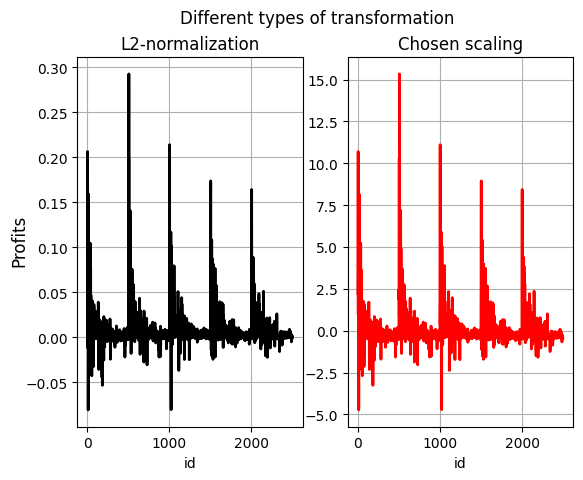

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualize the transformation
fig, axs = plt.subplots( nrows=1, ncols=2, sharex=True, sharey=False)
fig.suptitle('Different types of transformation')

plt.subplot(1, 2, 1)
axs[0].plot(p_L2, 'k', linewidth=2), axs[0].grid()
plt.title('L2-normalization')
plt.xlabel('id')

plt.subplot(1, 2, 2)
axs[1].plot(p_transformed, 'r', linewidth=2), axs[1].grid()
plt.title('Chosen scaling')
plt.xlabel('id')

fig.supylabel('Profits')

plt.show()
plt.tight_layout()

Note: If you had selected a column with not-a-number(s), then Normalizer returns an error (it is not able to manage the presence of such invalid values). You should remove them or substitute them. To be brief, only for the scope of this lab, you can select another column.

# **TASK 3: Visualize the dataframe**

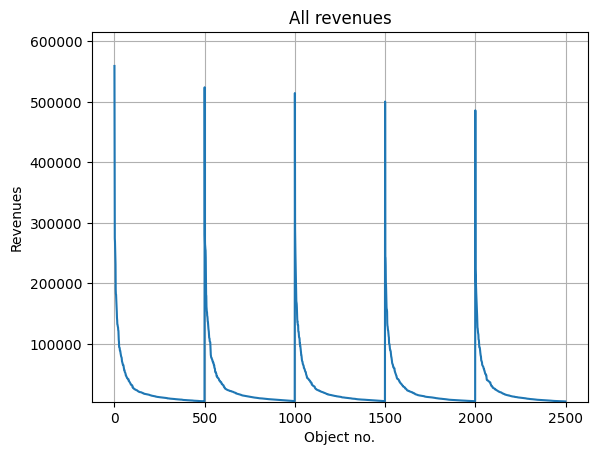

In [ ]:
# Using Matplotlib, plot the revenues. Hint: plt.plot
%matplotlib inline

# Extract the revenues
rev = df["revenues"]
MIN = 0.9*rev.min()
MAX = 1.1*rev.max()

# Plot them
plt.figure()
plt.plot(rev)
plt.xlabel('Object no.')
plt.ylabel('Revenues')
plt.ylim(MIN, MAX)
plt.title('All revenues')
plt.grid()
plt.show()

      revenues  year
461     5987.6  2021
961     6498.6  2020
1462    6442.2  2019
1997    5453.6  2018
2499    5145.0  2017
MIN     5145.0 2017.0
MAX     6498.6 2021.0


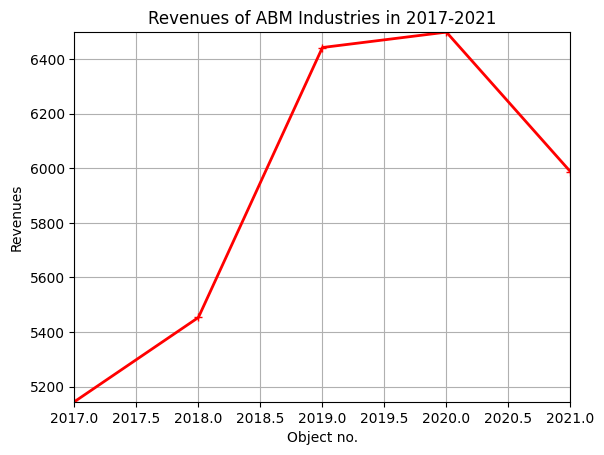

In [ ]:
# Using Matplotlib, plot the revenues of a specific company (e.g., ABM Industries) in the years

# Extract the revenues of ABM Industries
rev_ABM = df[df.company=="ABM Industries"][["revenues", "year"]]   # or: rev_ABM = df.loc[df.company=="ABM Industries",["revenues", "year"]]
print(rev_ABM)

MIN = rev_ABM.min()
MAX = rev_ABM.max()
print("MIN    ", MIN[0], MIN[1])
print("MAX    ", MAX[0], MAX[1])

x = np.array( rev_ABM["year"] )
y = np.array( rev_ABM["revenues"] )

# print("\n")
# print(x,y)

# Plot them
plt.figure()
plt.plot(x, y, 'r+-', linewidth=2.0)
plt.xlabel('Object no.')
plt.ylabel('Revenues')
plt.xlim(MIN[1], MAX[1])
plt.ylim(MIN[0], MAX[0])
plt.grid()
plt.title('Revenues of ABM Industries in 2017-2021')
plt.show()

# plt.savefig("ABM.png")
# files.download("ABM.png")

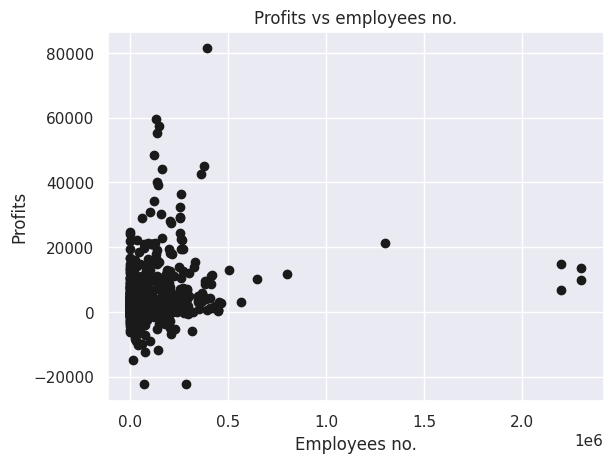

In [ ]:
# Using Matplotlib, make a scatterplot to see if any trend exists between PROFITS and employees. Hint: plt.scatter

# Check on the lef side at "{x}": the profits are already available as Series (named "P"). Then, transform it into a numpy array.
# pro = np.array(p)
pro = np.array(  df["profits"] )


# Extract the employees
emp = np.array( df["employees"] )

plt.figure()
plt.scatter(emp, pro, color='k')
plt.xlabel('Employees no.')
plt.ylabel('Profits')
plt.grid()
plt.title('Profits vs employees no.')
plt.show()

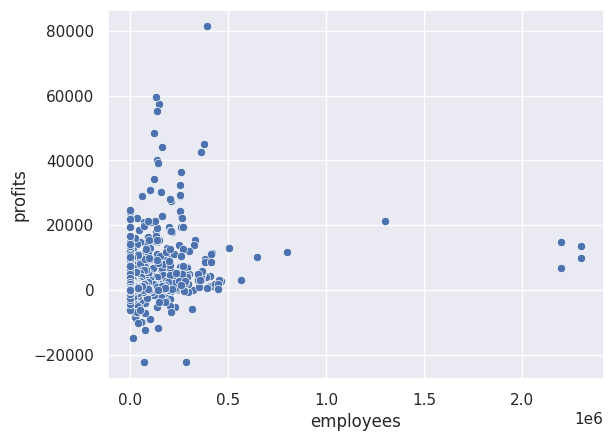

In [ ]:
# Repeat the scatterplot using SEABORN
sns.set_theme(style='dark')

sns.scatterplot( df, x="employees", y="profits")
plt.grid()
plt.show()

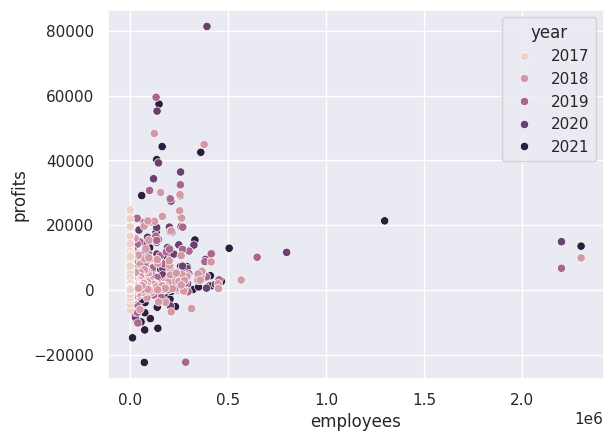

In [ ]:
# Try also this:
sns.scatterplot( df, x="employees", y="profits", hue="year")
plt.grid()
plt.show()

It does not seem to be any trend between the number of employees and the profits. Check with the revenues, it might be different.



---


### **_This is the end of Lab#1 session._**

---



---